In [26]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
import numpy as np

import nfl_data_py as nfl

In [27]:
receivers = pd.read_csv('../data/espn_receiver_stats.csv')

In [28]:
receivers = receivers[receivers['Year'] == 2022].reset_index(drop=True)

In [30]:
receivers = receivers[['Player', 'Team', 'tgts', 'Yds/Rt', 'YAC', 'Open', 'Catch']]

In [33]:
teams = nfl.import_team_desc()

In [35]:
receivers = receivers.merge(teams, left_on='Team', right_on='team_nick')

In [37]:
receivers

,Player,Team,tgts,Yds/Rt,YAC,Open,Catch,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,A.J. Brown,Eagles,161,2.8,62,92,61,PHI,Philadelphia Eagles,3700,Eagles,NFC,NFC East,#004C54,#A5ACAF,#acc0c6,#000000,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/phi.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,DeVonta Smith,Eagles,137,2.3,56,63,76,PHI,Philadelphia Eagles,3700,Eagles,NFC,NFC East,#004C54,#A5ACAF,#acc0c6,#000000,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/phi.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,Dallas Goedert,Eagles,66,2.1,53,53,68,PHI,Philadelphia Eagles,3700,Eagles,NFC,NFC East,#004C54,#A5ACAF,#acc0c6,#000000,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/phi.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,Justin Jefferson,Vikings,184,2.8,50,81,81,MIN,Minnesota Vikings,3000,Vikings,NFC,NFC North,#4F2683,#FFC62F,#e9bf9b,#000000,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/min.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,K.J. Osborn,Vikings,83,1.2,52,55,56,MIN,Minnesota Vikings,3000,Vikings,NFC,NFC North,#4F2683,#FFC62F,#e9bf9b,#000000,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/min.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Zay Jones,Jaguars,128,1.7,32,62,48,JAX,Jacksonville Jaguars,2250,Jaguars,AFC,AFC South,#006778,#000000,#9f792c,#d7a22a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/jax.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
123,Marvin Jones,Jaguars,89,1.2,33,44,65,JAX,Jacksonville Jaguars,2250,Jaguars,AFC,AFC South,#006778,#000000,#9f792c,#d7a22a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/jax.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
124,Christian Kirk,Jaguars,153,2.0,34,63,35,JAX,Jacksonville Jaguars,2250,Jaguars,AFC,AFC South,#006778,#000000,#9f792c,#d7a22a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/jax.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
125,Evan Engram,Jaguars,98,1.7,46,42,46,JAX,Jacksonville Jaguars,2250,Jaguars,AFC,AFC South,#006778,#000000,#9f792c,#d7a22a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/jax.png,https://github.com/nflverse/nflverse-pbp/raw/m

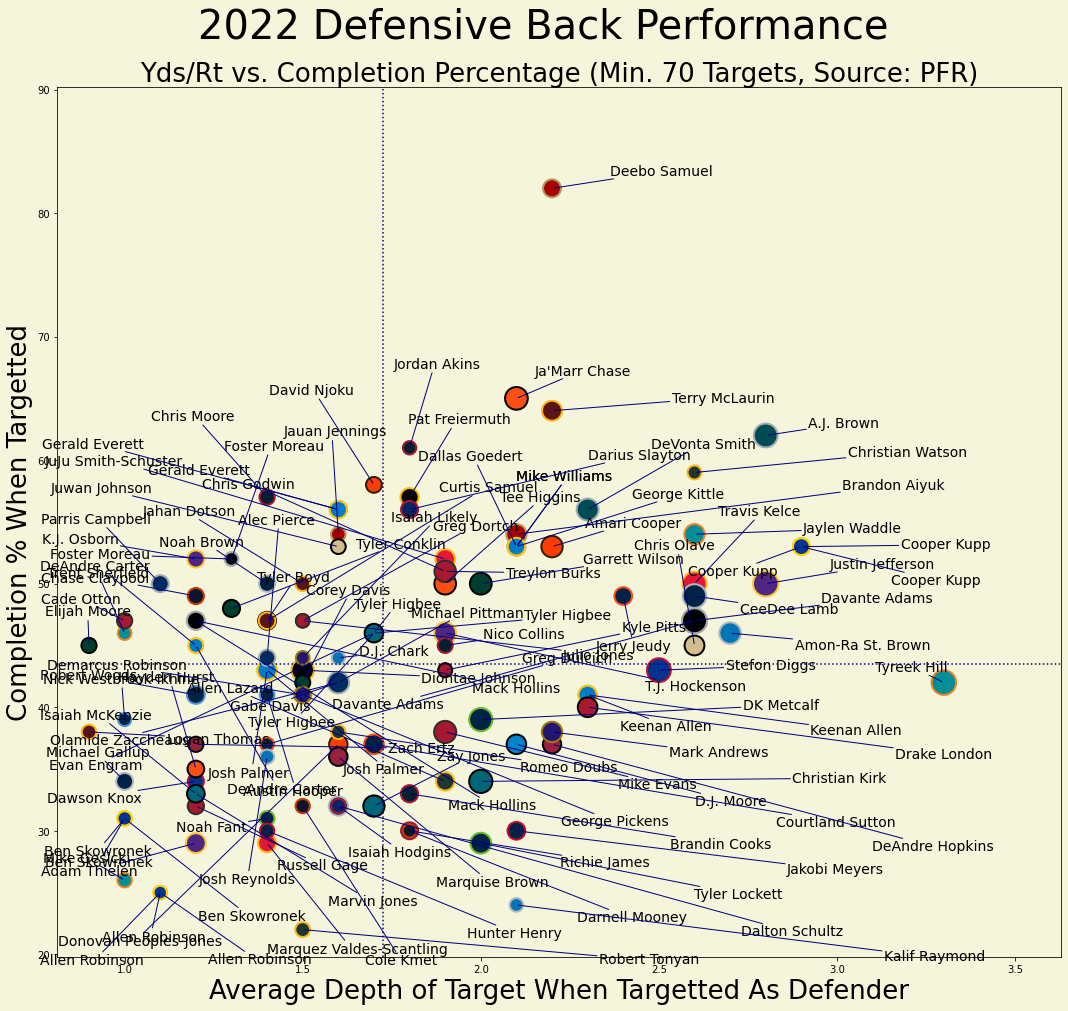

In [40]:
fig, ax = plt.subplots(figsize=(18, 16))

fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')

# Use scatter points instead of logos
# adjust size of points relative to 'Att'
point_size = receivers['tgts'] / max(receivers['tgts']) * 650
scatter = ax.scatter(receivers['Yds/Rt'], receivers['YAC'], c=receivers['team_color'],
                     s=point_size, edgecolor=receivers['team_color2'], linewidth=2)

texts = []
for x0, y0, player in zip(receivers['Yds/Rt'], receivers['YAC'], receivers['Player']):
    texts.append(ax.text(x0, y0, player, fontsize=14))

# Adjust text labels
adjust_text_params = {
    'texts': texts,
    'expand_points': (2.2, 2.5),
    'expand_text': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'navy',
    },
}
adjust_text(**adjust_text_params)

plt.suptitle("2022 Defensive Back Performance",
             fontsize=40, y=0.95, ha='center')
plt.title("Yds/Rt vs. Completion Percentage (Min. 70 Targets, Source: PFR)",
          fontsize=26, y=1.0, ha='center')
plt.xlabel('Average Depth of Target When Targetted As Defender', fontsize=26)
plt.ylabel('Completion % When Targetted', fontsize=26)

# make the axes limits +10% of the max value
x_max = receivers['Yds/Rt'].max()
y_max = receivers['YAC'].max()

# make the axes minimums -10% of the max value
x_min = receivers['Yds/Rt'].min()
y_min = receivers['YAC'].min()

# set the axes limits
plt.xlim(x_min * 0.9, x_max * 1.1)
plt.ylim(y_min * 0.9, y_max * 1.1)

# Draw horizontal and vertical lines at the mean of each axis
mean_y = receivers['YAC'].mean()
mean_x = receivers['Yds/Rt'].mean()

plt.axhline(mean_y, color='navy', linestyle='dotted')
plt.axvline(mean_x, color='navy', linestyle='dotted')

# Save the plot as a high-quality image
plt.savefig('../images/advanced_dbs.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()